In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
from matplotlib import cm

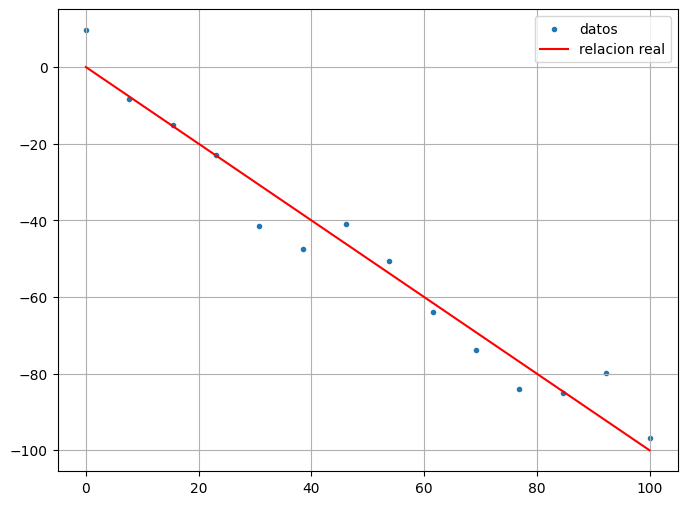

In [4]:
# Variables de control
cant_datos = 14
ordenada = 0
pendiente = -1

data = dict()
data['x'] = np.linspace(start=0, stop=100, num=cant_datos, endpoint=True)
step = data['x'][1]-data['x'][0]
data['y'] = np.full(cant_datos,ordenada) + pendiente*(data['x'] + np.random.normal(0,step,cant_datos))# + np.random.normal(0,5,cant_datos)
data['y_real'] = np.full(cant_datos, ordenada) + pendiente*data['x']

# Grafico

plt.figure(figsize=(8,6))
plt.grid()
plt.scatter(data['x'], data['y'], label='datos', marker='.')
plt.plot(data['x'], data['y_real'], color='red', label='relacion real')
plt.legend()
plt.show()

(14, 1) (14,)
15875.938847111762


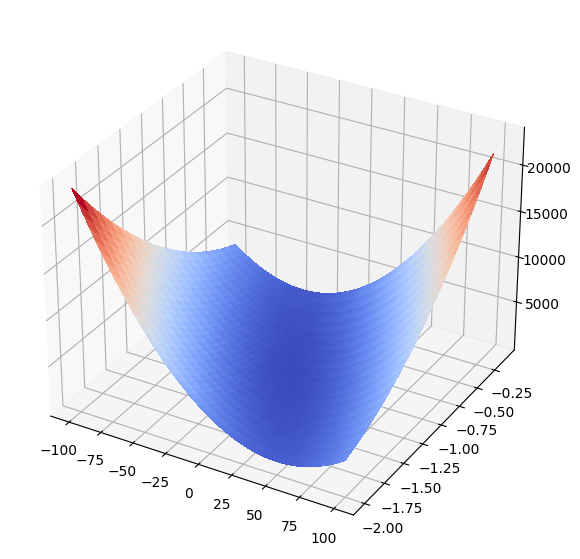

In [5]:
# Scikit-learn requiere vector transpuesto 

x_train = data['x'].reshape(-1,1)   # n x 1
y_train = np.transpose(data['y'])
print(x_train.shape,y_train.shape)

# Funcion del error cuadratico medio (RSS)
def error_cuadratico_medio(x,y,beta):
  error = 0
  for m,val in enumerate(y):
    y_est = beta[0] + beta[1]*x[m]
    error += (y_est - val)**2
  return error/(len(y))

# Probando con algun beta se puede ver el RSS para ese beta
beta = [9.7,1]
print(error_cuadratico_medio(data['x'],data['y'],beta))

beta_test = [np.arange(ordenada-100,ordenada+100,0.5),np.arange(pendiente-1,pendiente+1,0.1)]
x_beta, y_beta = np.meshgrid(beta_test[0],beta_test[1])
z_beta = error_cuadratico_medio(data['x'],data['y'],[x_beta,y_beta])

fig, ax = plt.subplots(subplot_kw={'projection':'3d'},figsize=(10,7))
surf = ax.plot_surface(x_beta,y_beta,z_beta, cmap=cm.coolwarm, linewidth=0, antialiased=False)

#print(np.min(z_beta),np.argmin(z_beta))


Estimated [-0.8428771332338982, array([-0.98448668])] // R2 = 0.9584707639185253


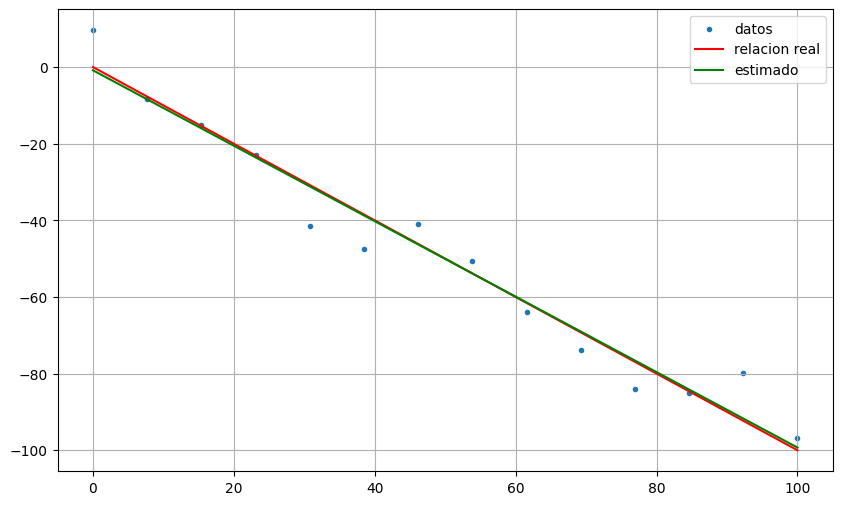

In [6]:
# Lo mismo pero usando scikit-learn

from sklearn.linear_model import LinearRegression

reg = LinearRegression()      # Se indica el modelo
reg.fit(x_train,y_train)      # Deben ir transpuestos

estimated = [reg.intercept_,reg.coef_]

R2 = reg.score(x_train,y_train) # R2
print(f"Estimated {estimated} // R2 = {R2}")

x_est = np.linspace(start=np.min(data['x']),stop=np.max(data['x']),num=cant_datos)
y_est = estimated[0] + np.transpose(estimated[1])*x_est

plt.figure(figsize=(10,6))
plt.grid()
plt.scatter(data['x'],data['y'],label='datos',marker='.')
plt.plot(data['x'],data['y_real'],color='red',label='relacion real')
plt.plot(x_est,y_est,color='green',label='estimado')
plt.legend()
plt.show()

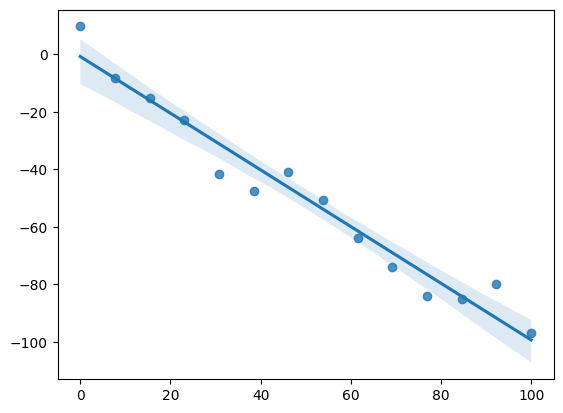

In [9]:
import seaborn as sns
ax = sns.regplot(x = data['x'], y = data['y'], ci = 95) 
# Seaborn automaticamente te crea el Cinturon de confianza del ajuste con cuadrados minimos

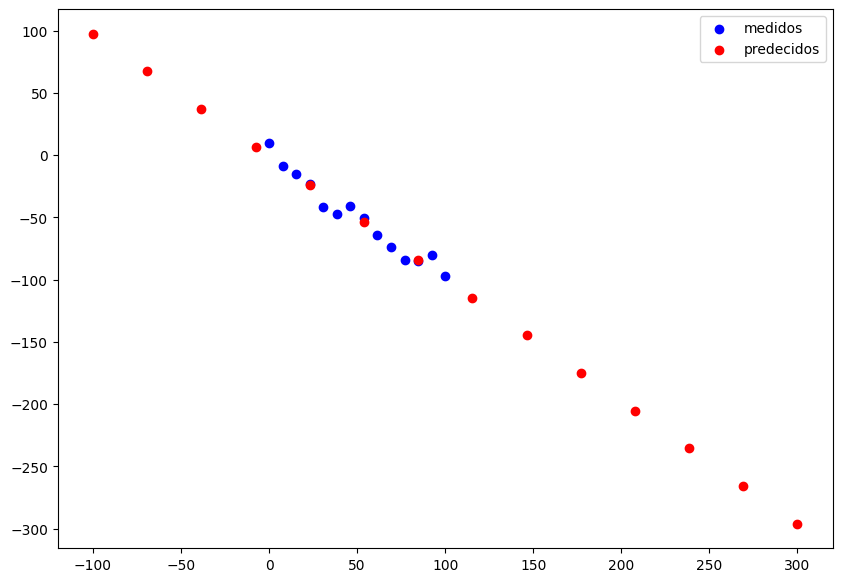

In [10]:
# Prediciendo datos
x_new = np.linspace(-100,300,cant_datos)
x_new = x_new.reshape(-1,1)
y_new = reg.predict(x_new)

plt.figure(figsize=(10,7))
plt.scatter(data['x'],data['y'],color='blue',label='medidos')
plt.scatter(x_new,y_new,color='red',label='predecidos')
plt.legend()
plt.show()

**REGRESIÓN MULTIVARIADA (2 DIM)**

parametros reales -> [-1  3  3]// estimados -> [-0.9999999999999432, 3.0000000000000018, 2.999999999999998]
1.0


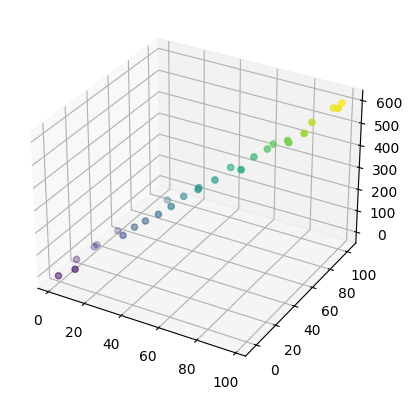

In [11]:
cant_datos = np.random.randint(10,30)
param = np.random.randint(-5,5,size=3) #real beta0, beta1, beta2 al azar

multi =dict()
multi['x1'] = np.linspace(0,100,num=cant_datos)+np.random.normal(0,2,cant_datos)
multi['x2'] = np.linspace(0,100,num=cant_datos)+np.random.normal(0,3,cant_datos)
multi['y'] = param[0] + param[1]*multi['x1'] + param[2]*multi['x2']

x_multi = np.column_stack((multi['x1'],multi['x2']))
y_multi = np.transpose(multi['y'])

reg = LinearRegression()
reg.fit(x_multi,y_multi)

estimated = [reg.intercept_,reg.coef_[0],reg.coef_[1]]
print(f"parametros reales -> {param}// estimados -> {estimated}")
R2 = reg.score(x_multi,y_multi)
print(R2)

fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for a three-dimensional line

ax.scatter3D(multi['x1'], multi['x2'], multi['y'], c=multi['y'])